In [1]:
cd ../

/Users/merad/Documents/wildwood


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from wildwood import ForestClassifier

In [4]:
from sklearn.datasets import make_moons


In [5]:

norm = plt.Normalize(vmin=0.0, vmax=1.0)
levels = 30


def get_mesh(X, h=0.02, padding=0.5):
    """Build a regular meshgrid using the range of the features in X
    """
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_mesh = np.array([xx.ravel(), yy.ravel()]).T
    return xx, yy, X_mesh


def plot_scatter_binary_classif(
    ax,
    xx,
    yy,
    X,
    y,
    s=10,
    alpha=None,
    cm=None,
    title=None,
    fontsize=None,
    lw=None,
    norm=None,
    noaxes=False,
):
    if cm is None:
        cm = plt.get_cmap("RdBu")

    ax.scatter(X[:, 0], X[:, 1], c=y, s=s, cmap=cm, alpha=alpha, lw=lw, norm=norm)
    if title is not None:
        ax.set_title(title, fontsize=fontsize)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if noaxes:
        ax.axis("off")



def plot_contour_binary_classif(
    ax, xx, yy, Z, cm=None, alpha=0.8, levels=200, title=None, score=None, norm=None
):
    if cm is None:
        cm = plt.get_cmap("RdBu")
    ax.contourf(xx, yy, Z, cmap=cm, alpha=alpha, levels=levels, norm=norm)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if title is not None:
        ax.set_title(title, fontsize=14)
    if score is not None:
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=25,
            horizontalalignment="right",
        )

In [6]:

def plot_forest_effect(forest, dataset):
    n_estimators = forest.n_estimators
    _ = plt.figure(figsize=(2 * (n_estimators // 2 + 1), 4))

    X, y = dataset
    xx, yy, X_mesh = get_mesh(X)

    # Plot the training points
    ax = plt.subplot(2, n_estimators // 2 + 1, 1)
    plot_scatter_binary_classif(ax, xx, yy, X, y, title="Input data")

    forest.fit(X, y)

    Z = forest.predict_proba_trees(X_mesh)[:, :, 1]#

    for idx_tree in range(n_estimators):
        ax = plt.subplot(2, n_estimators // 2 + 1, idx_tree + 2)
        
        plot_contour_binary_classif(
            ax, xx, yy, Z[idx_tree].reshape(xx.shape), title="Tree #%d" % (idx_tree + 1), norm=norm, levels=levels
        )
        plot_scatter_binary_classif(ax, xx, yy, X, y, title="Input data")


    ax = plt.subplot(2, n_estimators // 2 + 1, n_estimators + 2)
    Z = forest.predict_proba(X_mesh)[:, 1].reshape(xx.shape)
    plot_contour_binary_classif(ax, xx, yy, Z, title="Forest", norm=norm, levels=levels)
    plt.tight_layout()



In [7]:
def plot_forest_effect2(n_estimators, dataset):
    #n_estimators = forest.n_estimators
    _ = plt.figure(figsize=(2.5 * (n_estimators + 2), 6))

    X, y = dataset
    xx, yy, X_mesh = get_mesh(X)

    # Plot the training points
    ax = plt.subplot(1, n_estimators + 2, 1, aspect=1.5)
    plot_scatter_binary_classif(ax, xx, yy, X, y, title="Input data", fontsize=14)

    forest_aggreg = ForestClassifier(n_estimators=n_estimators, random_state=random_state, aggregation=True)
    forest_no_aggreg = ForestClassifier(n_estimators=n_estimators, random_state=random_state, aggregation=False)
    forest_aggreg.fit(X, y)
    forest_no_aggreg.fit(X, y)

    for idx_clf, clf in enumerate([forest_aggreg, forest_no_aggreg]):
        Z = clf.predict_proba_trees(X_mesh)[:, :, 1]#

        for idx_tree in range(n_estimators):
            ax = plt.subplot(2, n_estimators + 2, idx_tree + 2 + (n_estimators + 2)*idx_clf)
            plot_contour_binary_classif(
                ax, xx, yy, Z[idx_tree].reshape(xx.shape), title="Tree #%d" % (idx_tree + 1), norm=norm, levels=levels
            )

        ax = plt.subplot(2, n_estimators + 2, (n_estimators + 2)*(1 + idx_clf))
        Z = clf.predict_proba(X_mesh)[:, 1].reshape(xx.shape)
        plot_contour_binary_classif(ax, xx, yy, Z, title="Forest", norm=norm, levels=levels)
        ax.yaxis.set_label_position("right")
        ax.set_ylabel("No aggregation" if idx_clf else "aggregation", rotation=270, labelpad=16, fontsize=14)
    plt.tight_layout(pad=0., w_pad=0., h_pad=1.0)


In [8]:
n_samples = 500

random_state = 42
dataset = make_moons(n_samples=n_samples, noise=0.15, random_state=random_state)


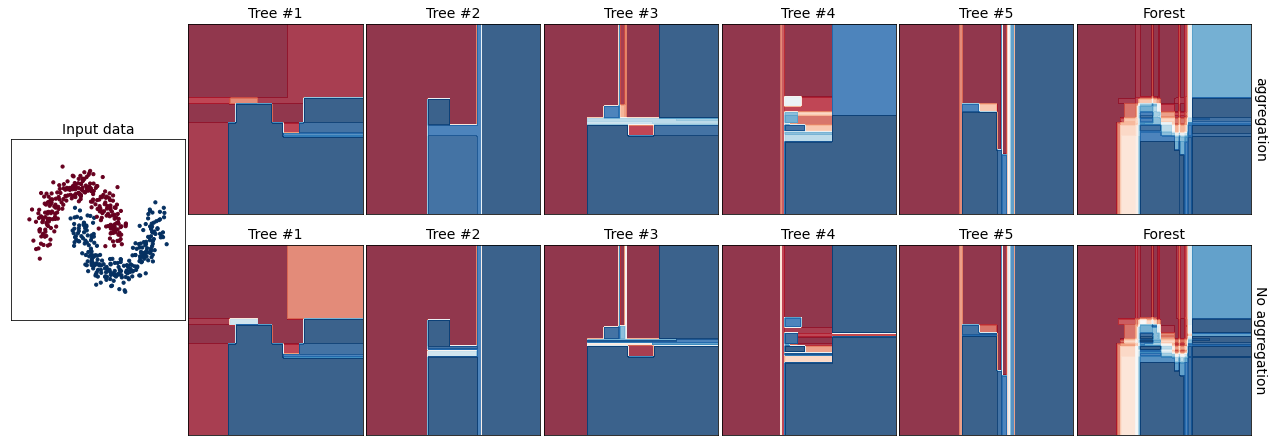

In [9]:
plot_forest_effect2(5, dataset)
#plt.savefig("fig1.pdf", bbox_tight=0)